# SRO Log Analysis

This notebook analyzes and visualizes the Short-Range Order (SRO) parameters from KMC simulations.

The warren cowley short-range order (SRO) parameter provides a quantitative
measure of how the local atomic arrangement in an alloy deviates from a random
distribution. For a pair of species $k$ and $l$ in the $i$-th neighbor shell,
the SRO parameter is defined as
$$
\alpha_i^{kl} = 1 - \frac{P_i^{kl}}{c_l},
$$
where $P_i^{kl}$ is the conditional probability that an atom of type $k$ has a
neighbor of type $l$ in shell $i$, and $c_l$ is the global concentration of
species $l$. The sign of $\alpha_i^{kl}$ reflects the underlying chemical
tendencies: 
- $\alpha_i^{kl} = 0$ corresponds to a random alloy,
- $\alpha_i^{kl} < 0$ indicates that $k$ and $l$ prefer to be near each other
(chemical ordering)
- $\alpha_i^{kl} > 0$ indicates that $k$ and $l$ avoid
each other (clustering or phase-separation tendency). 

Thus, warren cowley SRO
parameters describe whether specific atomic pairs are locally favored or
suppressed relative to a random solid solution.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [2]:
# Update this path to point to your CSV file
# csv_path = './configs_2025_11_20_23_05_58/sro_log.csv'  # Or use full path
# csv_path = './configs_2025_11_20_23_07_10/sro_log.csv'  # Or use full path
csv_path = '../configs_2025_11_23_23_27_20/sro_log.csv'  # Or use full path

# Load the data
df = pd.read_csv(csv_path)

# Display basic info
print(f"Data shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nTime range: {df['time'].min():.2e} to {df['time'].max():.2e}")
print(f"Steps: {df['step'].min()} to {df['step'].max()}")

# Show first few rows
df.head()

Data shape: (94, 30)

Columns: ['step', 'time', 'X-X', 'X-Ni', 'X-Co', 'X-Cu', 'X-Fe', 'X-Cr', 'X-Al', 'Ni-Ni', 'Ni-Co', 'Ni-Cu', 'Ni-Fe', 'Ni-Cr', 'Ni-Al', 'Co-Co', 'Co-Cu', 'Co-Fe', 'Co-Cr', 'Co-Al', 'Cu-Cu', 'Cu-Fe', 'Cu-Cr', 'Cu-Al', 'Fe-Fe', 'Fe-Cr', 'Fe-Al', 'Cr-Cr', 'Cr-Al', 'Al-Al']

Time range: 2.67e-14 to 1.22e-09
Steps: 0 to 93000


,step,time,X-X,X-Ni,X-Co,X-Cu,X-Fe,X-Cr,X-Al,Ni-Ni,...,Cu-Cu,Cu-Fe,Cu-Cr,Cu-Al,Fe-Fe,Fe-Cr,Fe-Al,Cr-Cr,Cr-Al,Al-Al
0,0,2.669362e-14,-33.030566,0.781958,0.784041,0.778141,0.779126,0.772193,0.783461,-1.47435,...,-1.480099,-1.470060,-1.475173,-1.472103,-1.480183,-1.477064,-1.466929,-1.460739,-1.477371,-1.479195
1,1000,4.371232e-11,-32.706959,0.771117,0.773484,0.704791,0.765121,0.761478,0.773373,-1.47435,...,-1.472027,-1.465328,-1.471005,-1.468224,-1.479907,-1.476910,-1.466737,-1.460739,-1.477371,-1.479195
2,2000,7.298854e-11,-32.529452,0.765316,0.766390,0.665553,0.758044,0.756228,0.766737,-1.47435,...,-1.468582,-1.462817,-1.468878,-1.465605,-1.479723,-1.476938,-1.466700,-1.460739,-1.477371,-1.479195
3,3000,9.701090e-11,-32.416535,0.762369,0.762569,0.641279,0.752041,0.752537,0.762243,-1.47435,...,-1.465855,-1.461209,-1.467507,-1.464014,-1.479555,-1.476827,-1.466488,-1.460739,-1.477371,-1.479195
4,4000,1.197131e-10,-32.303737,0.758237,0.758333,0.615447,0.749009,0.748364,0.758541,-1.47435,...,-1.463402,-1.460096,-1.465817,-1.462513,-1.479463,-1.476809,-1.466479,-1.460739,-1.477371,-1.479195


## Plot Cross-Element Interactions

Visualize interactions between different elements (e.g., X-Ni, X-Co, etc.)

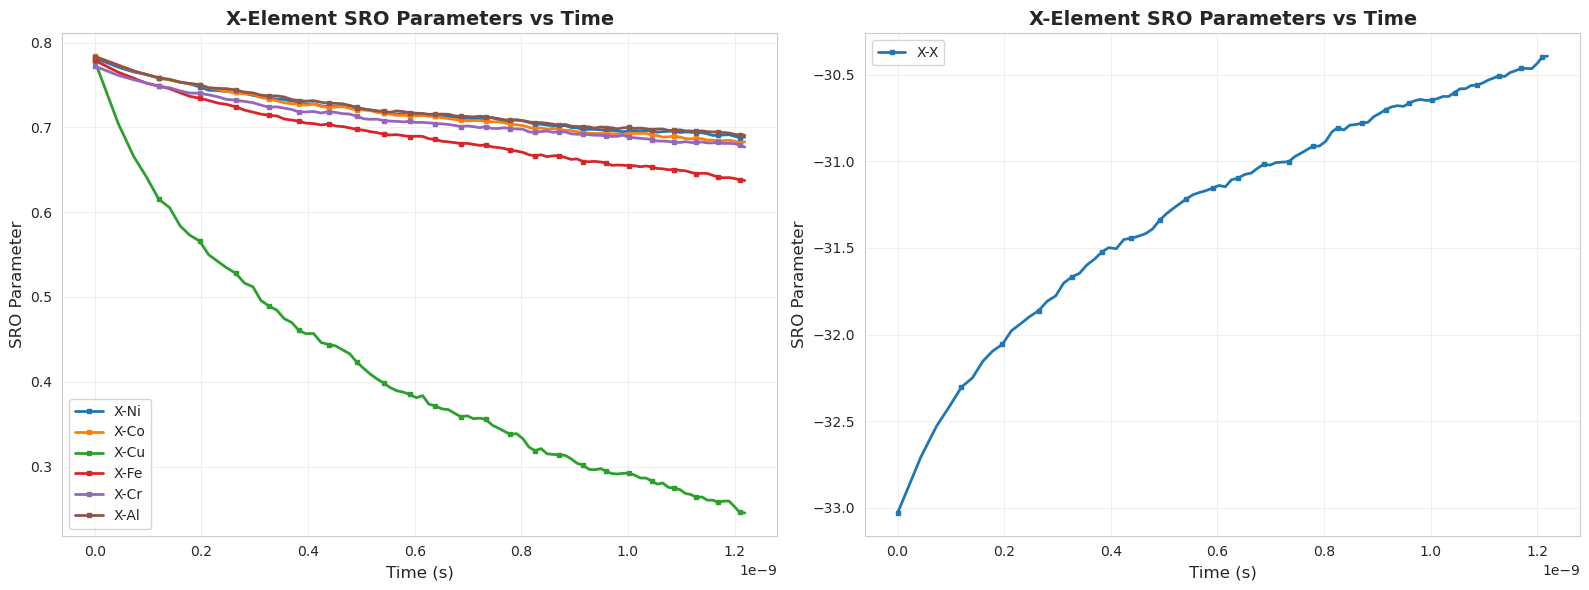

In [3]:
fig = plt.figure(figsize=(16, 6))
axes1 = fig.add_subplot(1, 2, 1)
x_pairs = [col for col in df.columns if col.startswith('X-') and col != 'X-X']

for pair in x_pairs:
    axes1.plot(df['time'], df[pair], label=pair, marker='s', 
            markersize=3, linewidth=2, markevery=max(len(df)//20, 1))

axes1.set_xlabel('Time (s)', fontsize=12)
axes1.set_ylabel('SRO Parameter', fontsize=12)
axes1.set_title('X-Element SRO Parameters vs Time', fontsize=14, fontweight='bold')
axes1.legend(fontsize=10)
axes1.grid(True, alpha=0.3)

axes2 = fig.add_subplot(1, 2, 2)
x_pairs = ['X-X']

for pair in x_pairs:
    axes2.plot(df['time'], df[pair], label=pair, marker='s', 
            markersize=3, linewidth=2, markevery=max(len(df)//20, 1))
axes2.set_xlabel('Time (s)', fontsize=12)
axes2.set_ylabel('SRO Parameter', fontsize=12)
axes2.set_title('X-Element SRO Parameters vs Time', fontsize=14, fontweight='bold')
axes2.legend(fontsize=10)
axes2.grid(True, alpha=0.3)
plt.tight_layout()
# plt.savefig('sro_x_elements_6x6x2.png', dpi=300)
# plt.savefig('sro_x_elements_6x6x6.png', dpi=300)
plt.savefig('sro_x_elements_24x24x24.png', dpi=300)
plt.show()